<a href="https://colab.research.google.com/github/tanvir0188/machine-learning-labs/blob/main/Lab1_Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 1 - Decision Tree

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

Load iris data set

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

Analyze the dataset

(150, 5)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
species
0    50
1    50
2    50
Name: count, dtype: int64


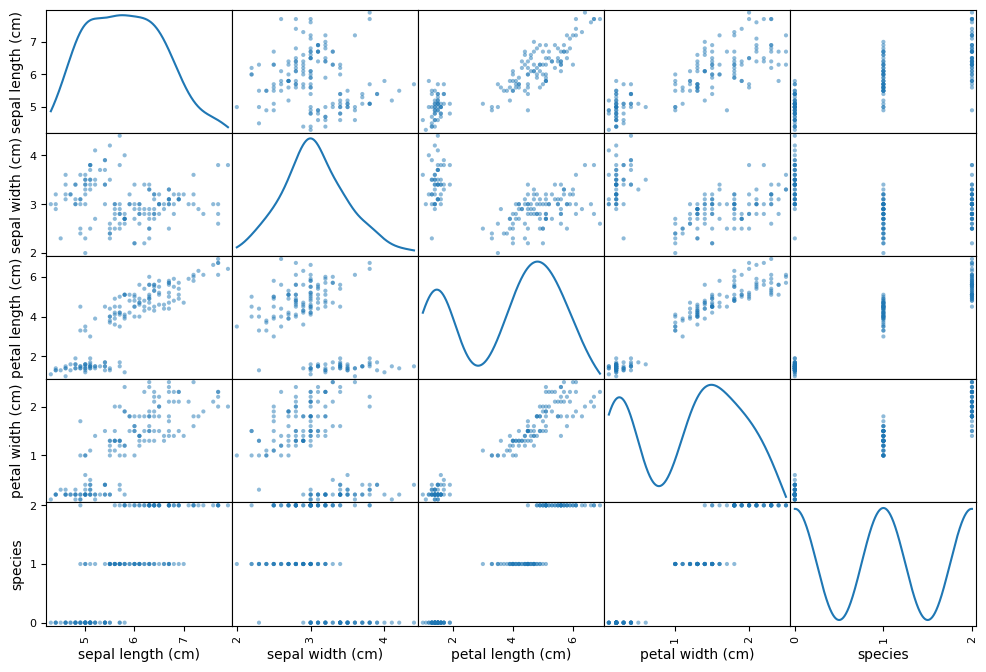

In [ ]:
# Convert the data to a pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Add the target column
df['species'] = iris.target
# Check the shape and summary of the data
print(df.shape)
print(df.describe())
# Check the distribution of the target classes
print(df['species'].value_counts())
# Plot the pairwise scatter plot of the features
pd.plotting.scatter_matrix(df, figsize=(12, 8), diagonal='kde')
plt.show()

Split the dataset into train and test. Fix the error in below code

In [ ]:
from sklearn.model_selection import train_test_split
# Define the features and the target
X = df.drop('species', axis=1)
y = df['species']
# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train and test

In [ ]:
# Create a decision tree classifier with gini criterion and maximum depth of 3
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
# Fit the model on the train data
dt.fit(X_train, y_train)
# Make predictions on the test data
y_pred = dt.predict(X_test)

Show the results

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


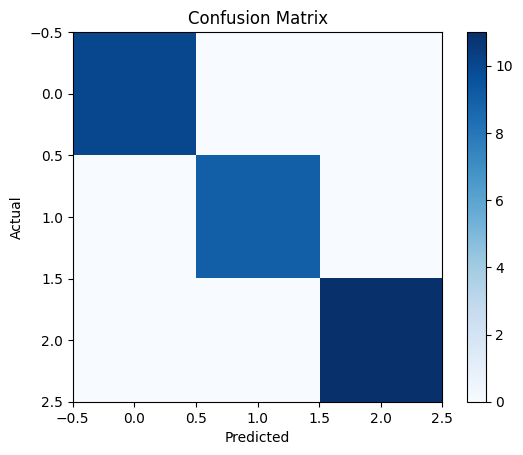

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Calculate the accuracy, precision, recall, and f1-score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
# Print the results
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()
# Print the classification report
print(classification_report(y_test, y_pred))

Plot the tree

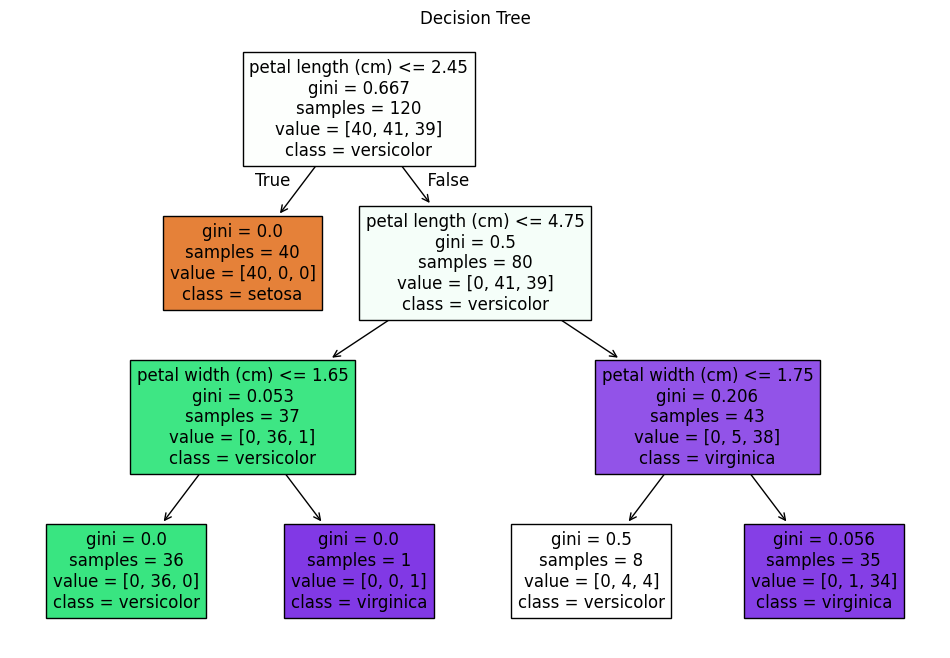

In [ ]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree')
plt.show()

# Random Forest

In [ ]:
# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [ ]:
# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.head())
# Describe the dataset
#description = df.describe()
#print(description)
# Plot the pairwise scatter plot of the features
#pd.plotting.scatter_matrix(df, figsize=(12, 8), diagonal='kde')
#plt.show()

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [ ]:
df['target'] = data.target
X = df.loc[:, df.columns != 'target']
y = df.loc[:, 'target'].values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

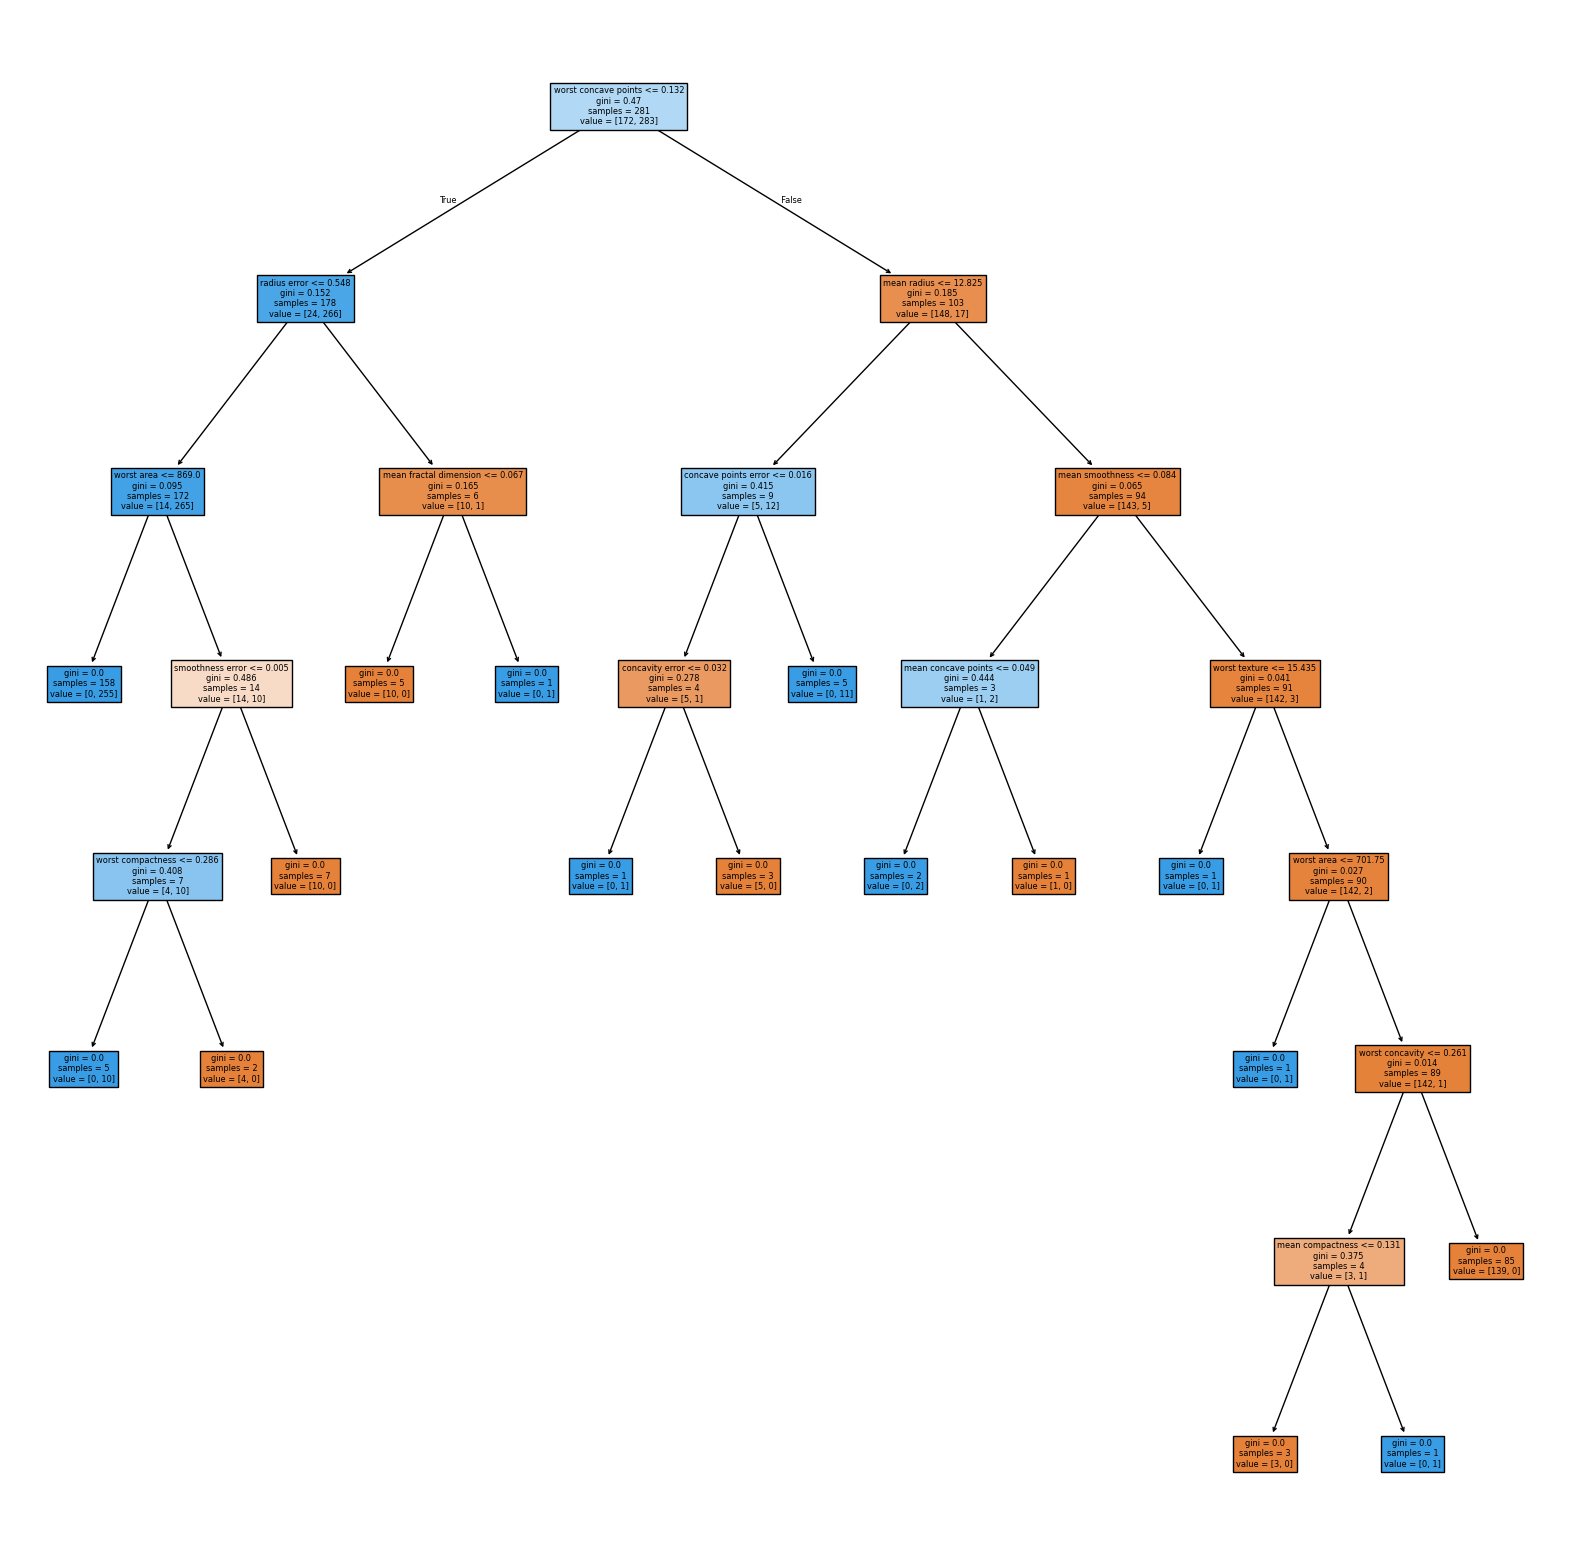

In [ ]:
plt.figure(figsize=(20, 20))
_ = tree.plot_tree(rf_classifier.estimators_[0], feature_names=X.columns, filled=True)
plt.show()

Classify Mushroom Using Decision Tree and Random Forest.

Dataset: https://archive.ics.uci.edu/dataset/73/mushroom

Submit:


1.   Submit your github link.
2.   Perform Exploratory Data Analysis (EDA) on the dataset.
3.   Evaluate and compare Random Forest tree accuracy for the folowing n_estimators values 1,50,100,150,200, and 250.
4.   Evaluate and compare performance of Random Forest and Decision Tree.
5.   Submit a report of EDA and results of tasks 3 and 4.



# Decision tree and Random forest on the mushroom dataset

Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
#for visualized representation
import seaborn as sns


Importing the dataset

In [ ]:

%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [ ]:
import matplotlib.pyplot as plt
# Analysis for features (X)
print("For X")
print("Head")
print(X.head())
print("Tail")
print(X.tail())
print("Info")
print(X.info())
print("Nunique")
print(X.nunique())
print("Missing Values")
print(X.isnull().sum())
print("Percentage of missing values in each column")
print((X.isnull().sum()/len(X))*100)
X = X.drop(columns=['veil-type'])
X.info()



For X
Head
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w         

Handle missing values in stalk-root by imputing

In [ ]:
X['stalk-root'] = X['stalk-root'].fillna(X['stalk-root'].mode()[0])

EDA analysis

In [ ]:
X.describe(include='all').T


,count,unique,top,freq
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728
stalk-shape,8124,2,t,4608


Seperate Numerical and categorical variables

In [ ]:
cat_cols= X.select_dtypes(include=['object']).columns
num_cols= X.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')
Numerical Variables:
[]


Frequency Count and Distribution

--- cap-shape ---
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64


C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


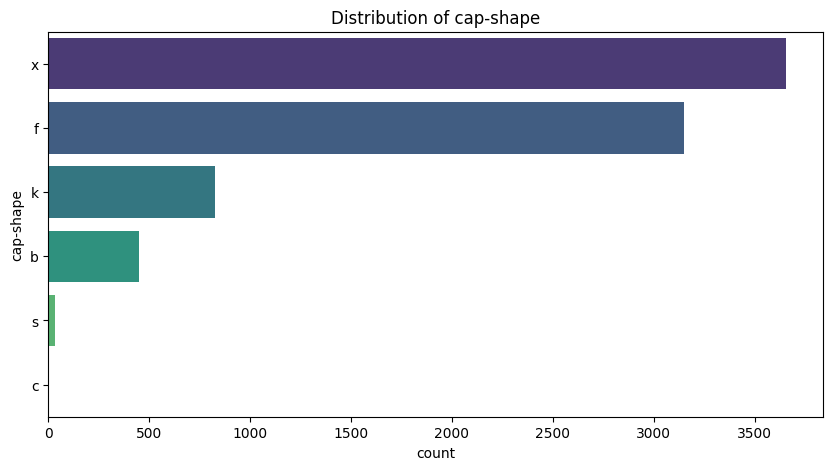

--- cap-surface ---
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64


C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


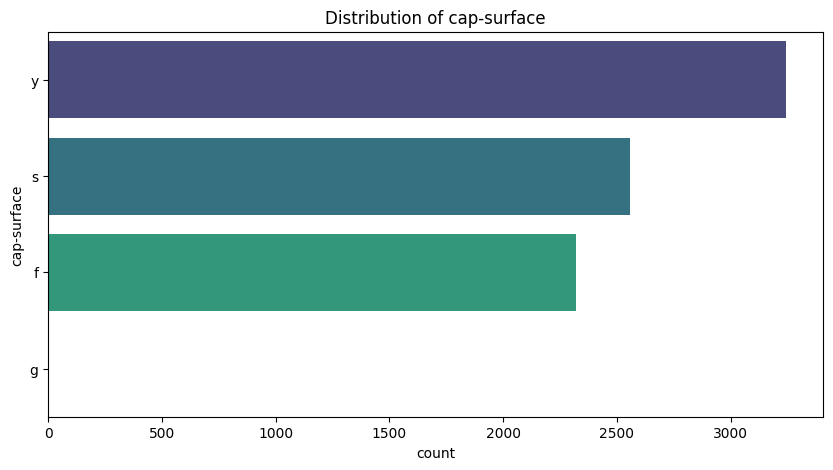

C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


--- cap-color ---
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64


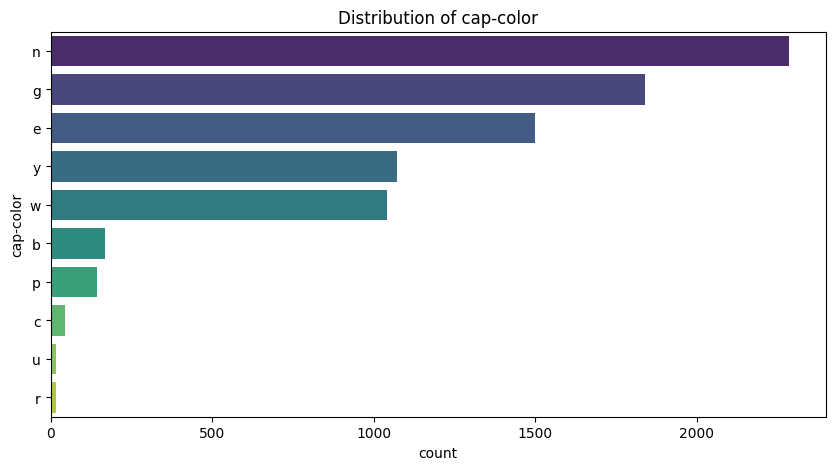

--- bruises ---
bruises
f    4748
t    3376
Name: count, dtype: int64


C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


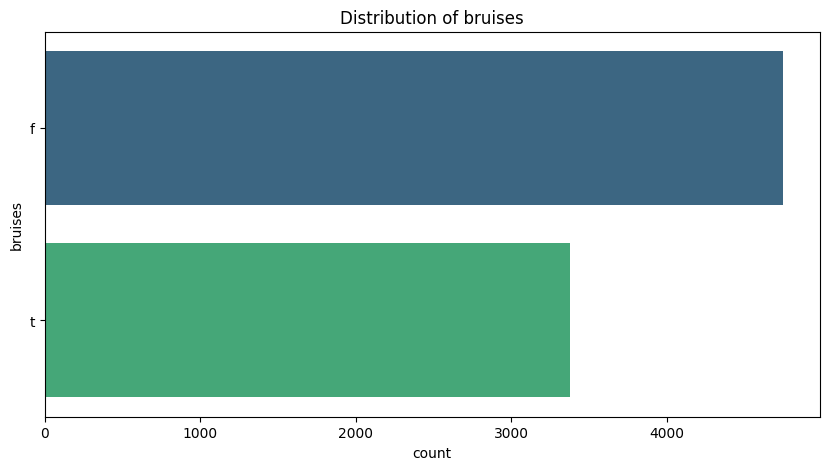

--- odor ---
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64


C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


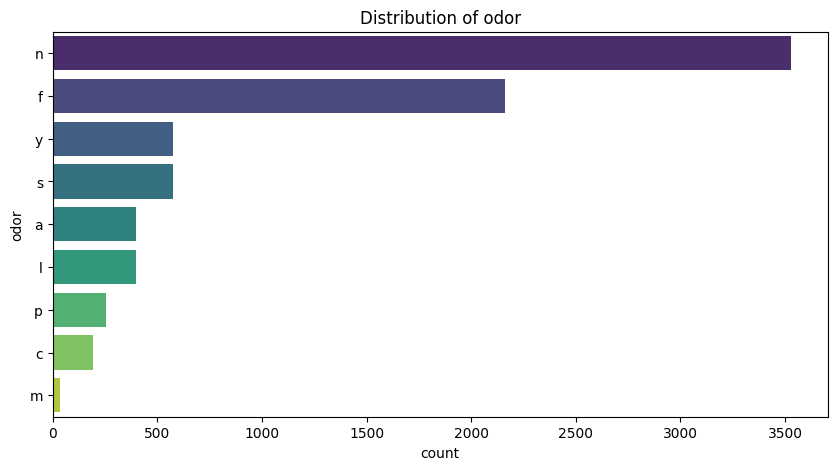

C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


--- gill-attachment ---
gill-attachment
f    7914
a     210
Name: count, dtype: int64


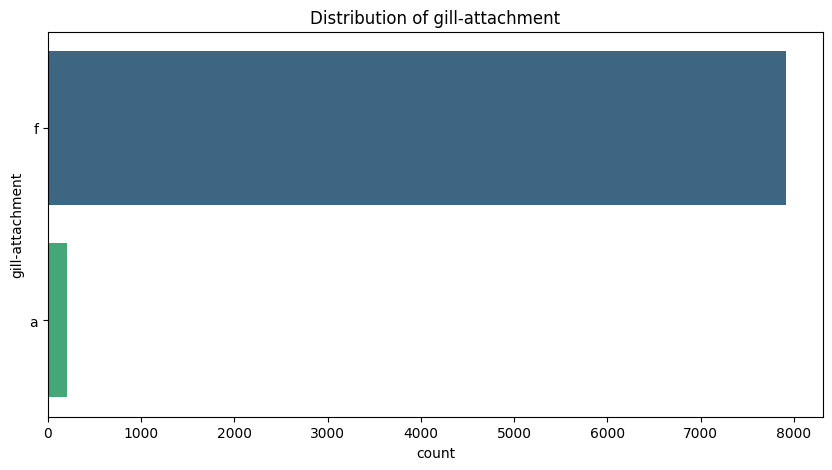

--- gill-spacing ---
gill-spacing
c    6812
w    1312
Name: count, dtype: int64


C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


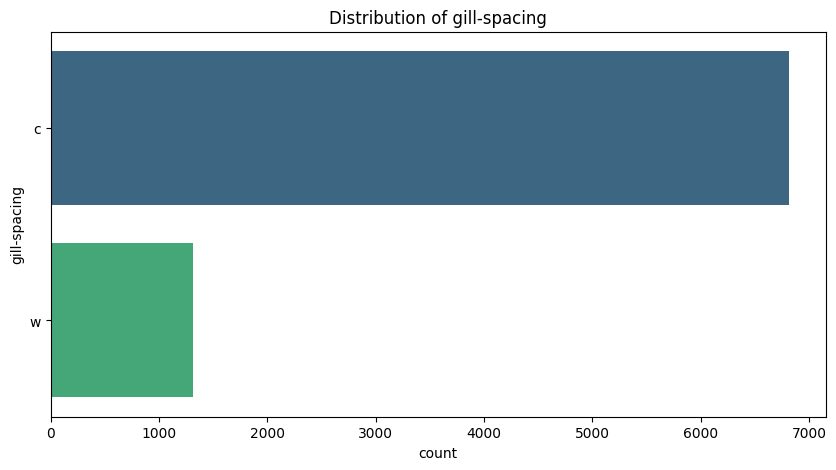

--- gill-size ---
gill-size
b    5612
n    2512
Name: count, dtype: int64


C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


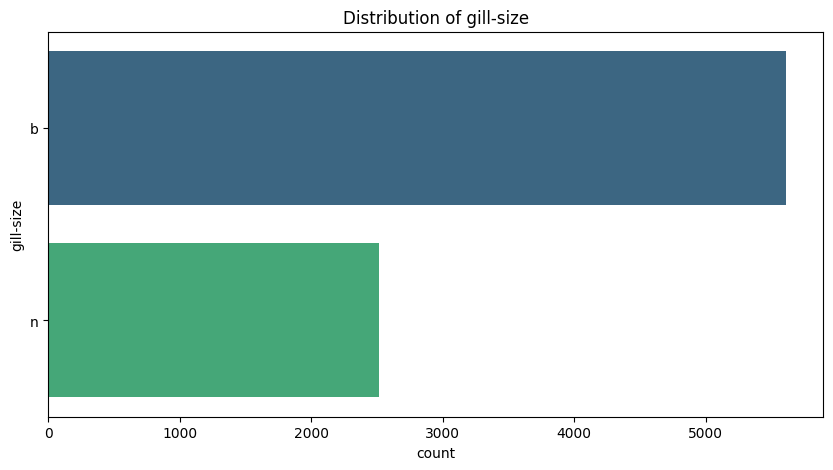

--- gill-color ---
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64


C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


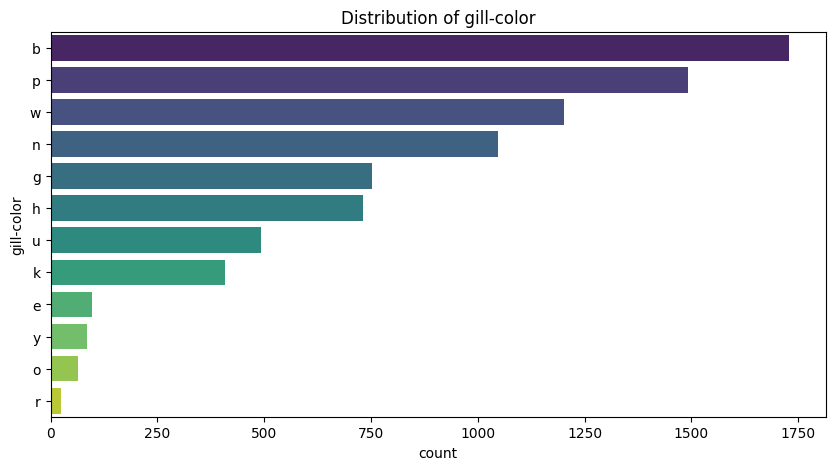

--- stalk-shape ---
stalk-shape
t    4608
e    3516
Name: count, dtype: int64


C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


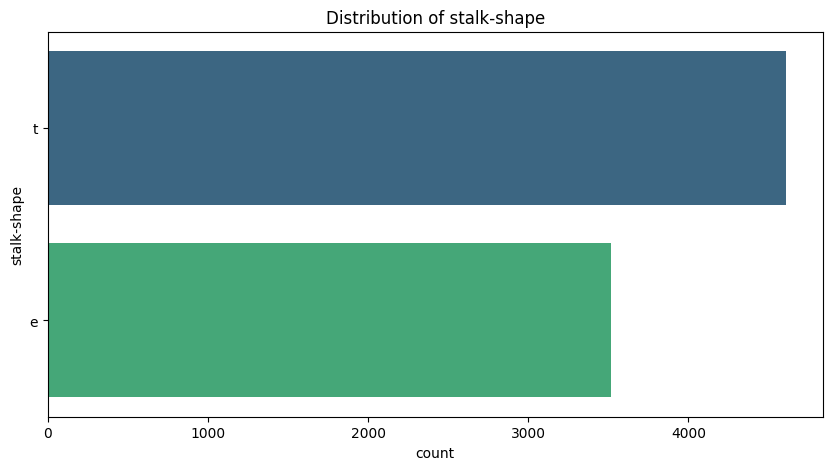

--- stalk-root ---
stalk-root
b    6256
e    1120
c     556
r     192
Name: count, dtype: int64


C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


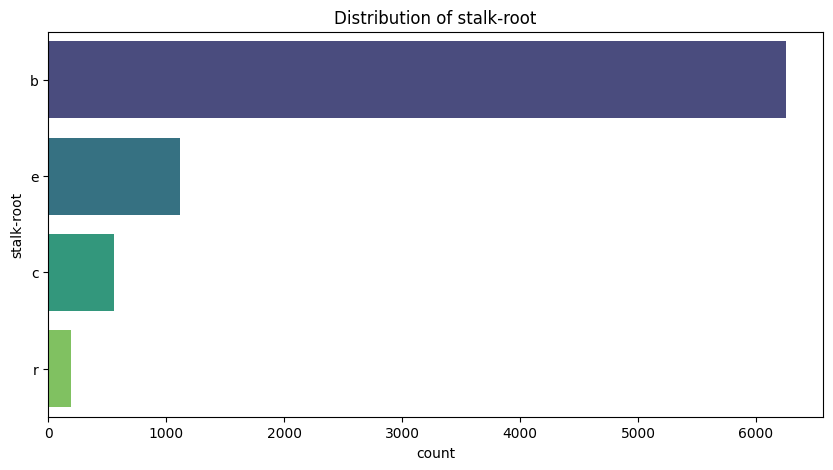

--- stalk-surface-above-ring ---
stalk-surface-above-ring
s    5176
k    2372
f     552
y      24
Name: count, dtype: int64


C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


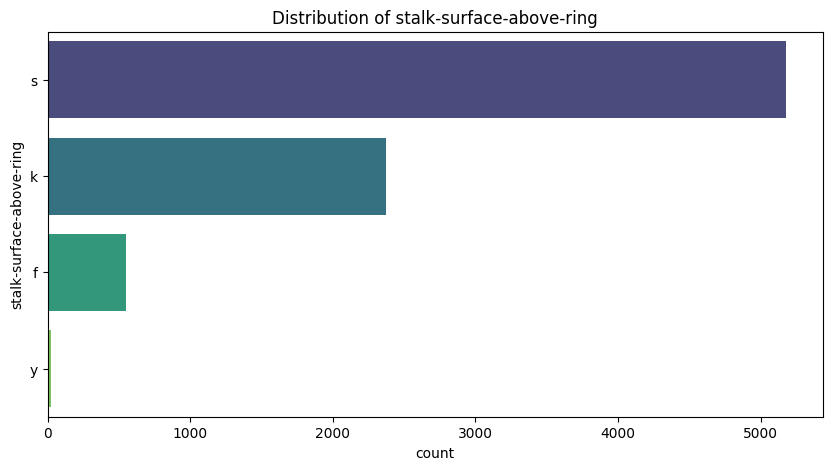

--- stalk-surface-below-ring ---
stalk-surface-below-ring
s    4936
k    2304
f     600
y     284
Name: count, dtype: int64


C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


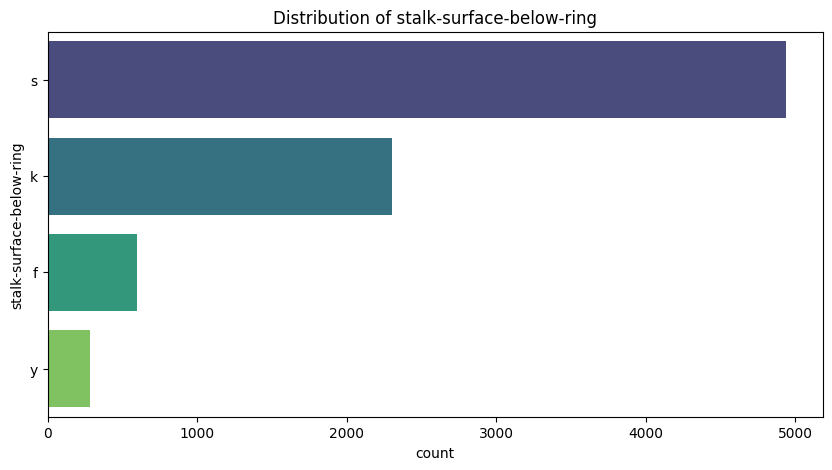

--- stalk-color-above-ring ---
stalk-color-above-ring
w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: count, dtype: int64


C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


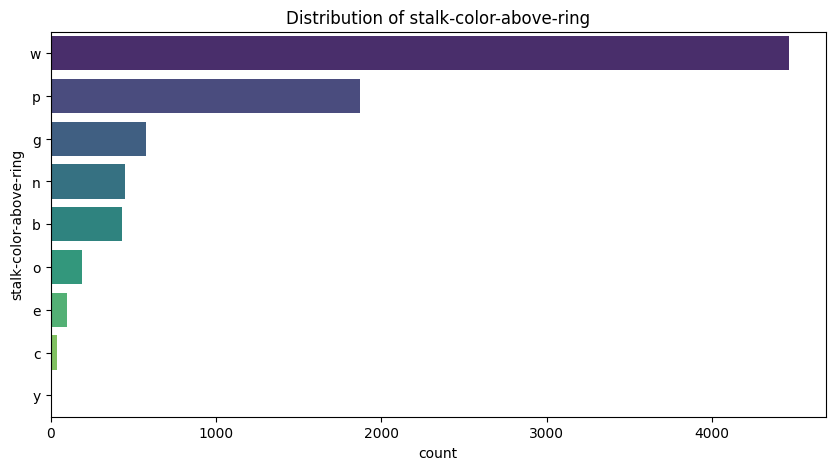

--- stalk-color-below-ring ---
stalk-color-below-ring
w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: count, dtype: int64


C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


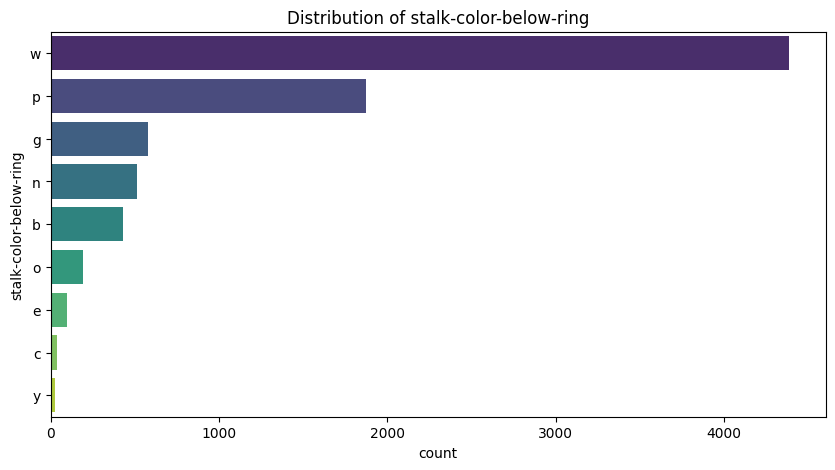

--- veil-color ---
veil-color
w    7924
n      96
o      96
y       8
Name: count, dtype: int64


C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


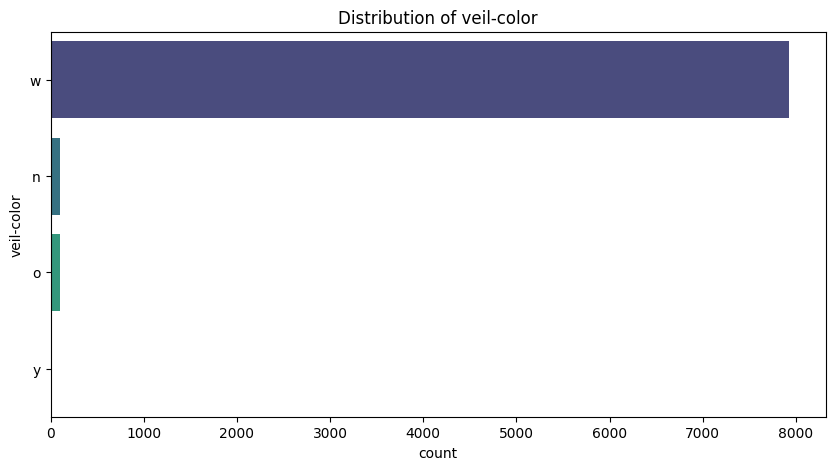

--- ring-number ---
ring-number
o    7488
t     600
n      36
Name: count, dtype: int64


C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


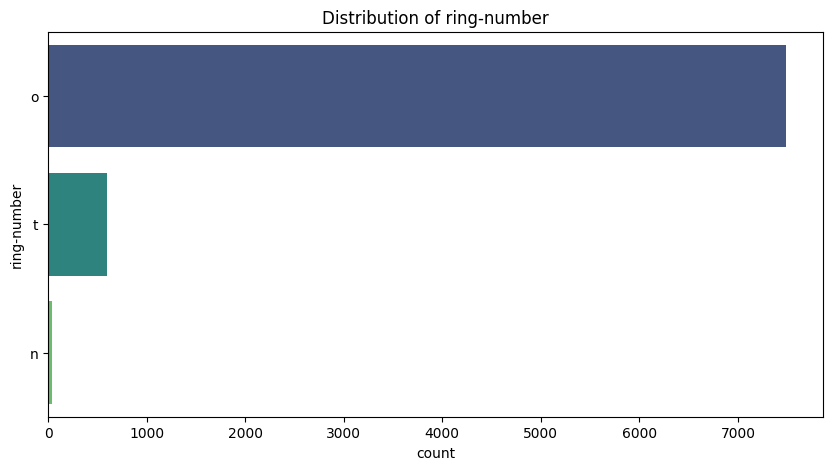

--- ring-type ---
ring-type
p    3968
e    2776
l    1296
f      48
n      36
Name: count, dtype: int64


C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


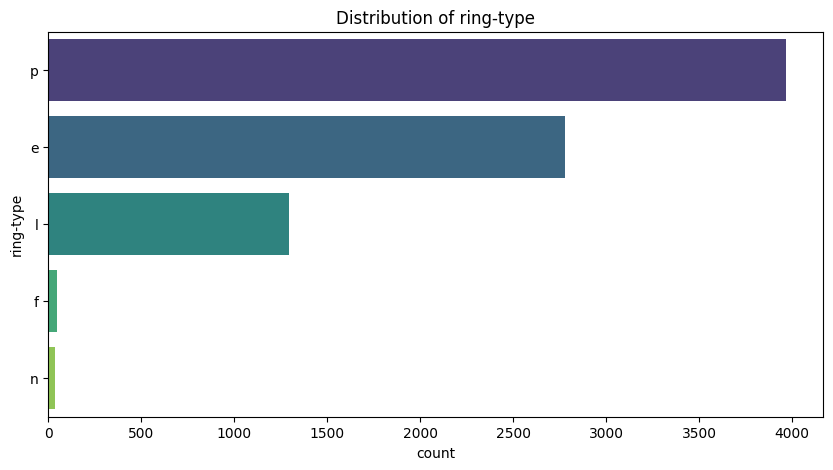

--- spore-print-color ---
spore-print-color
w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: count, dtype: int64


C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


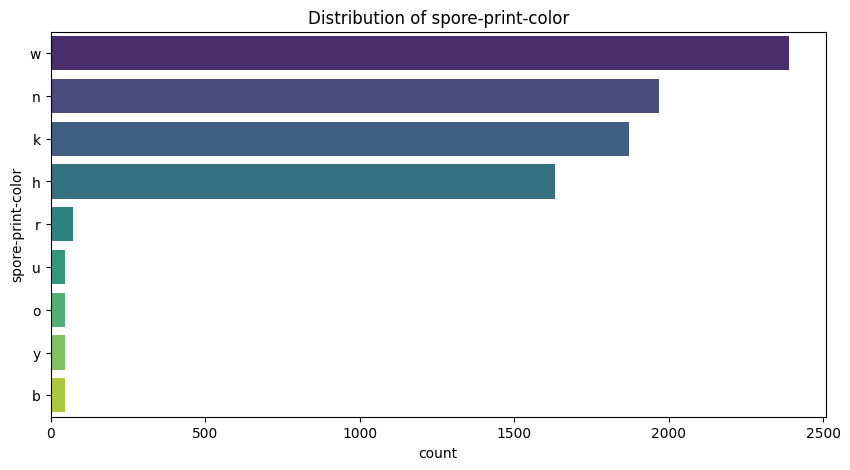

C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


--- population ---
population
v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: count, dtype: int64


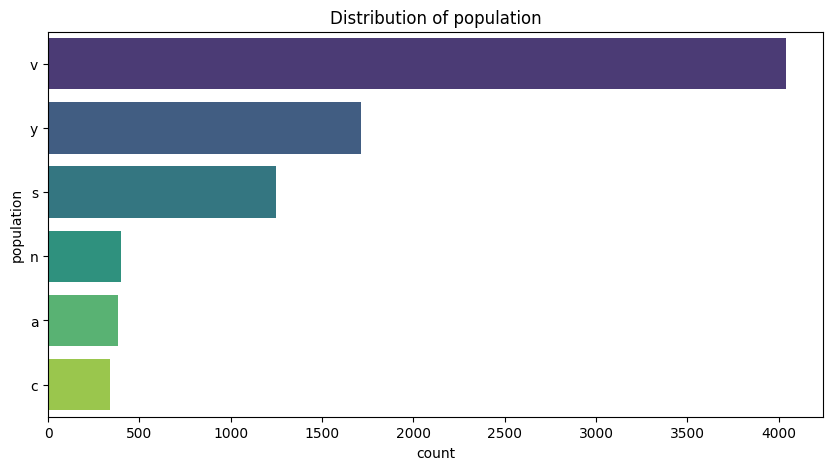

--- habitat ---
habitat
d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: count, dtype: int64


C:\Users\arnob tanvir\AppData\Local\Temp\ipykernel_16556\385492748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')


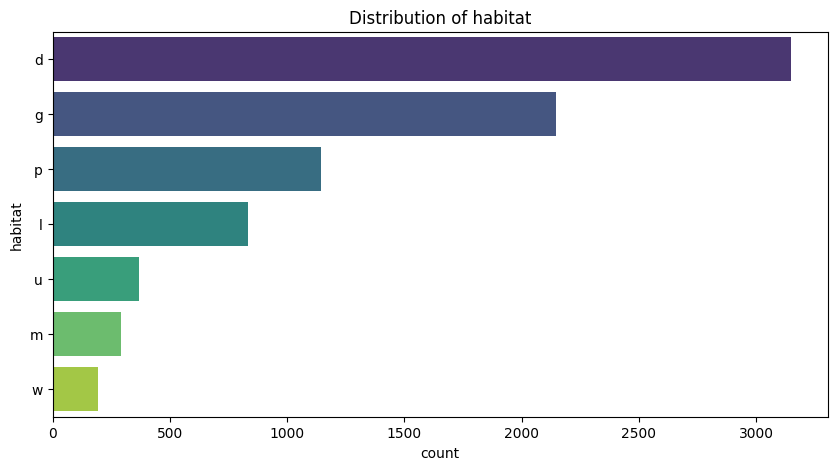

In [ ]:
for col in cat_cols:
    print(f"--- {col} ---")
    print(X[col].value_counts())
    plt.figure(figsize=(10, 5))
    sns.countplot(y=X[col], order=X[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.show()


Combine feature and target

In [ ]:
df = X.copy()
df['class'] = y

Relationship with Target variable

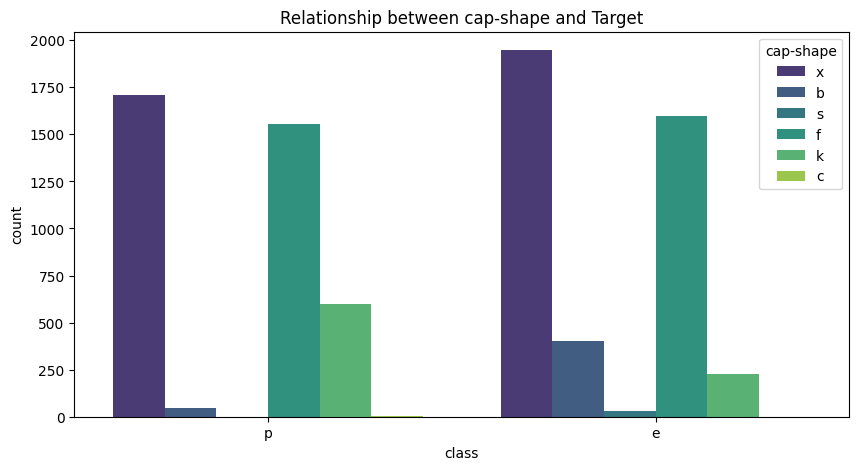

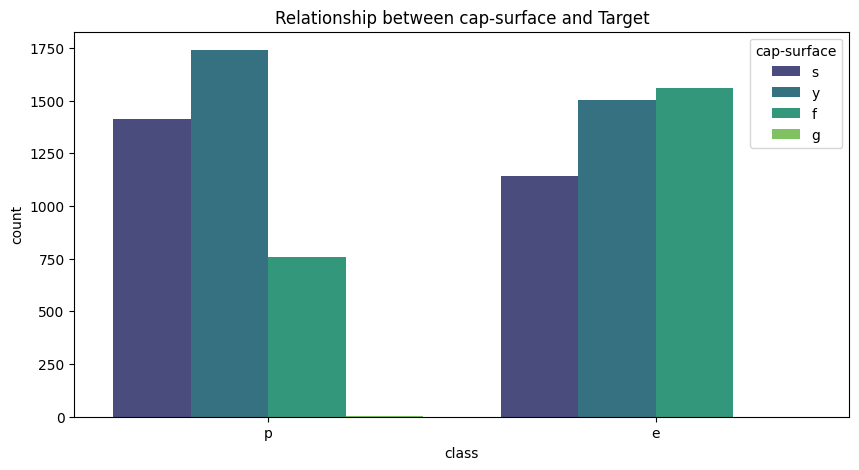

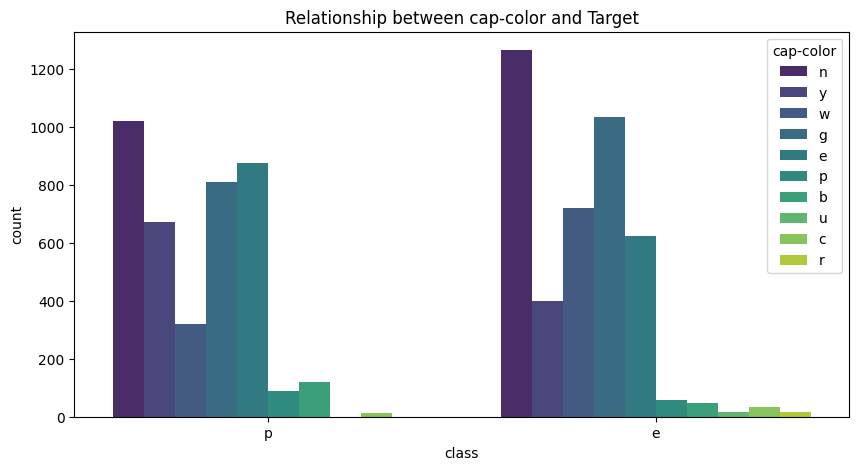

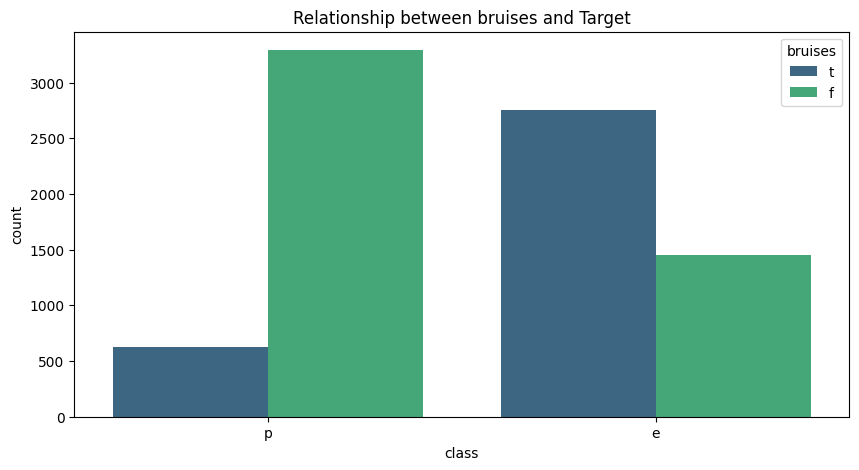

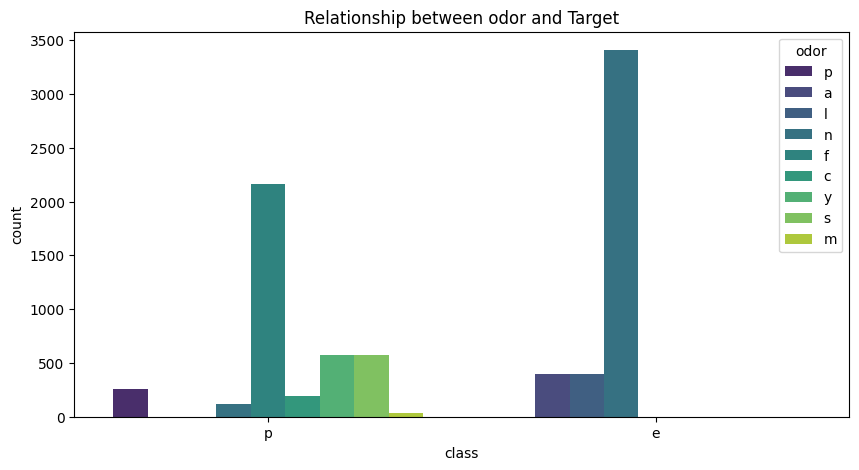

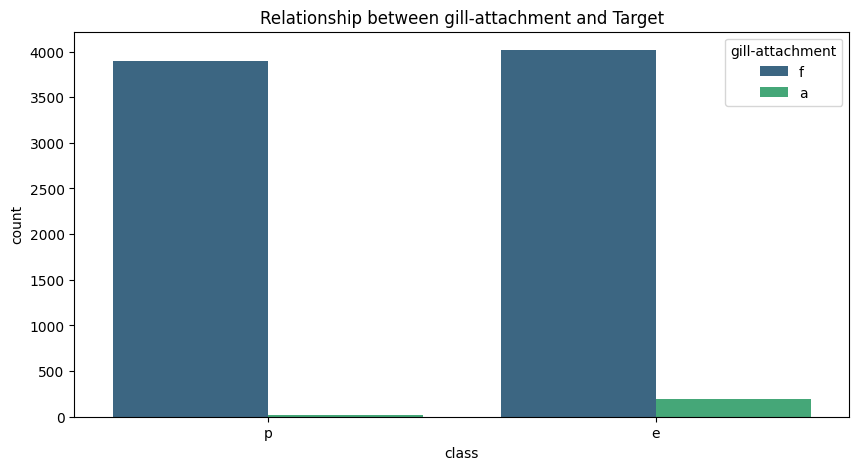

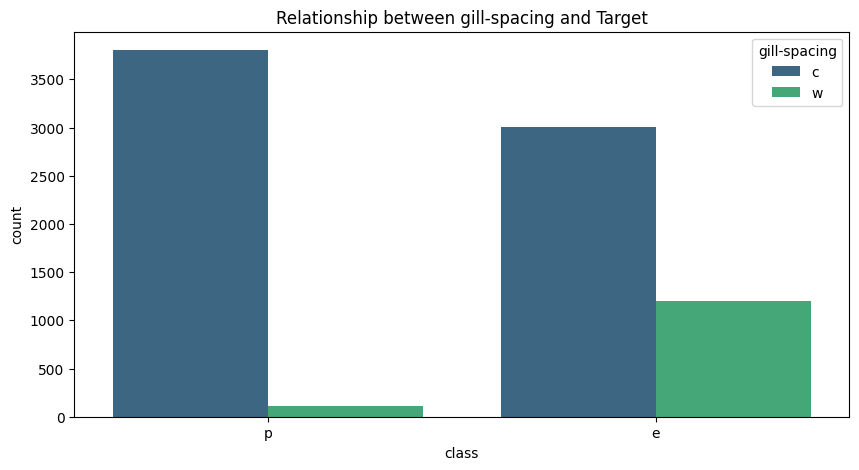

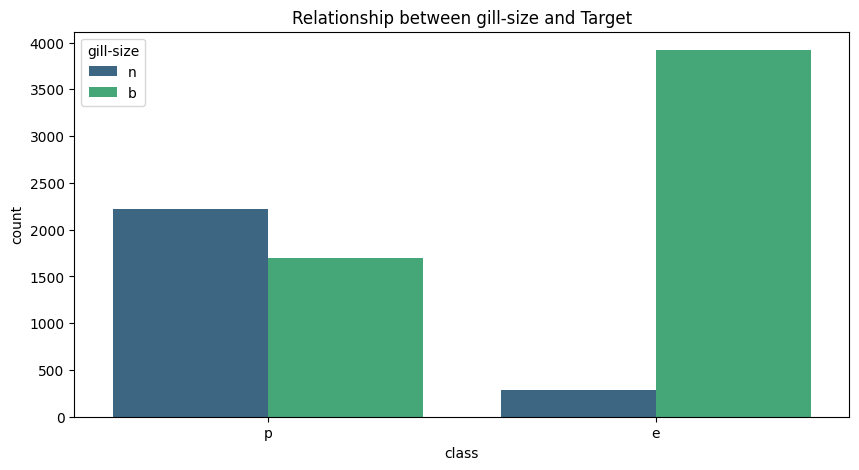

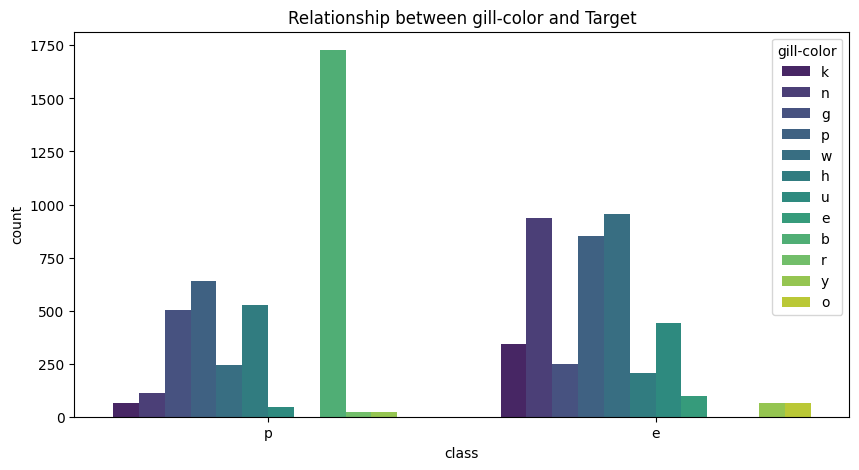

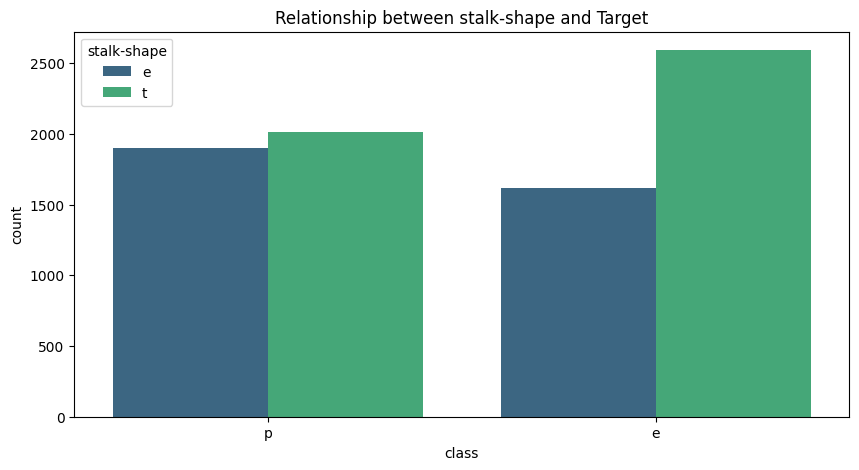

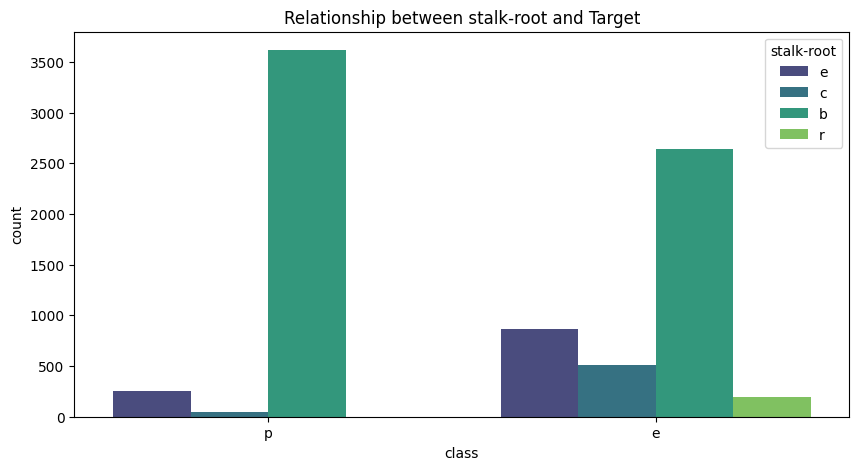

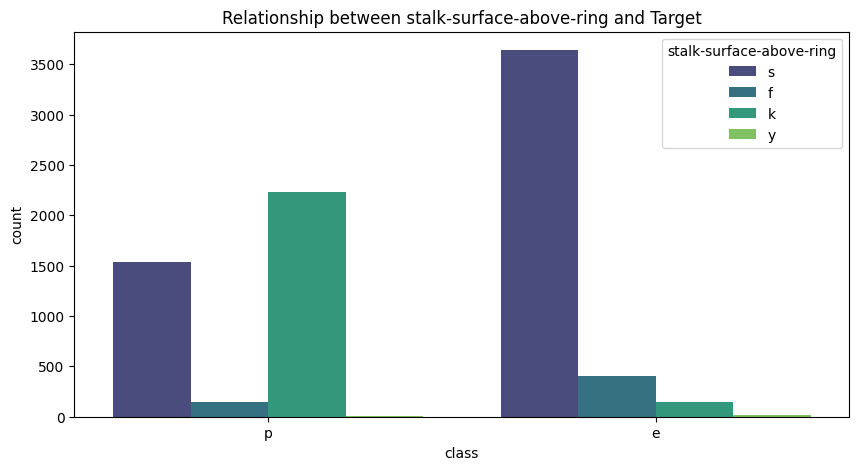

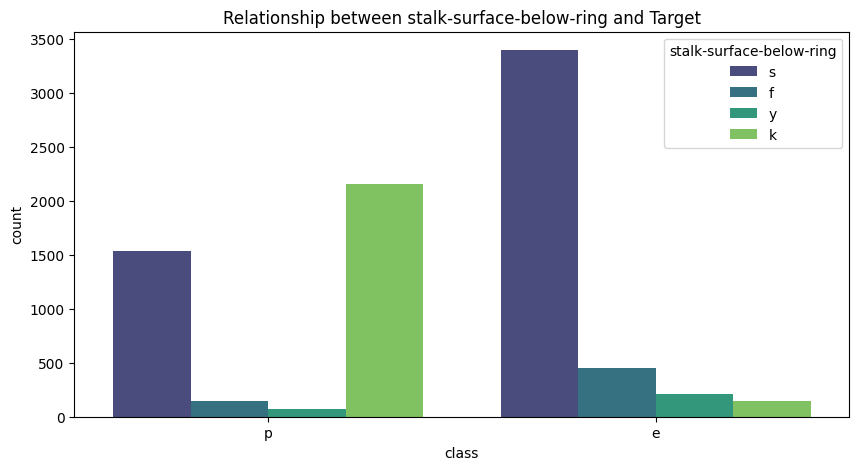

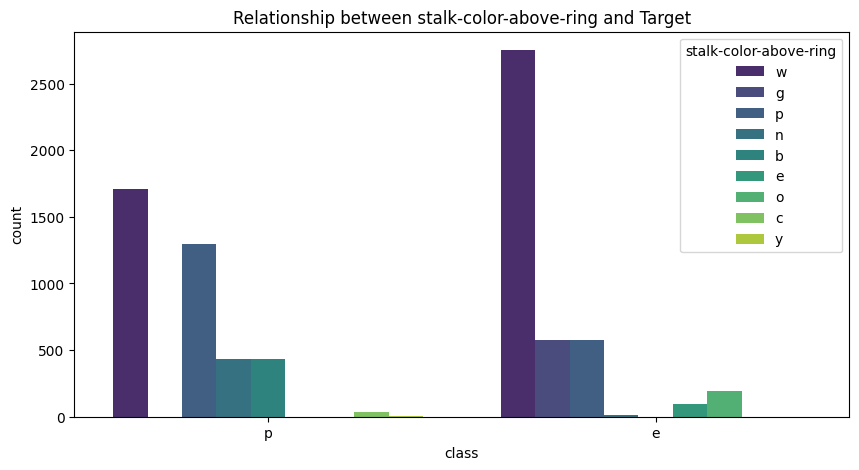

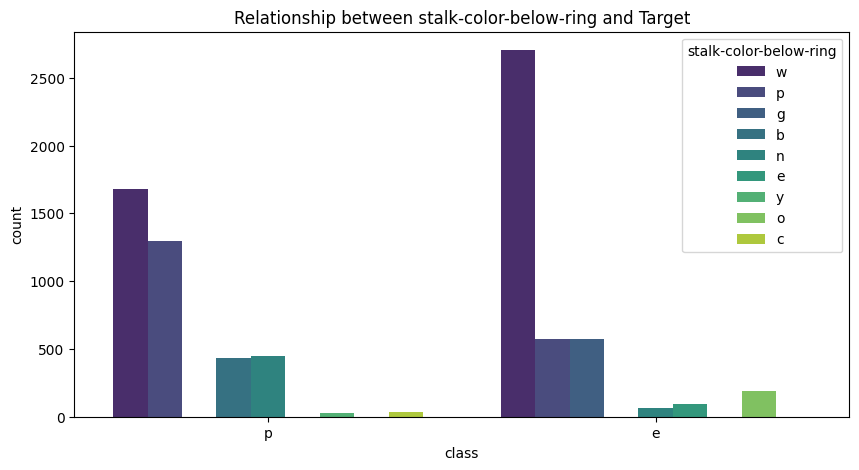

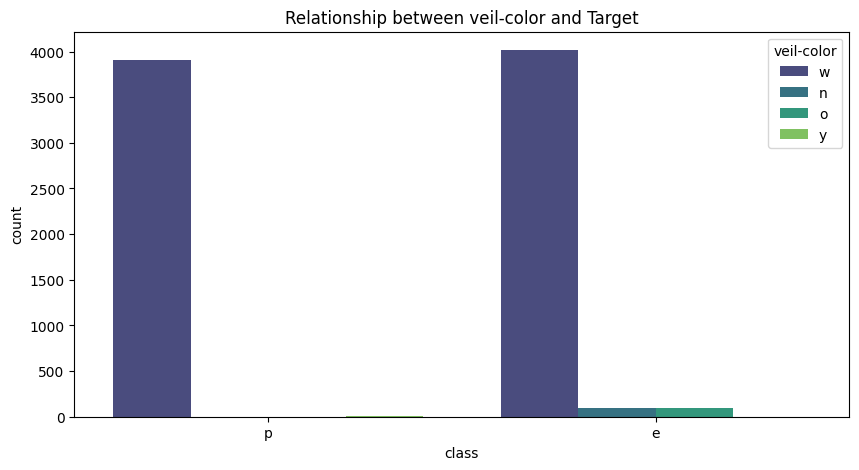

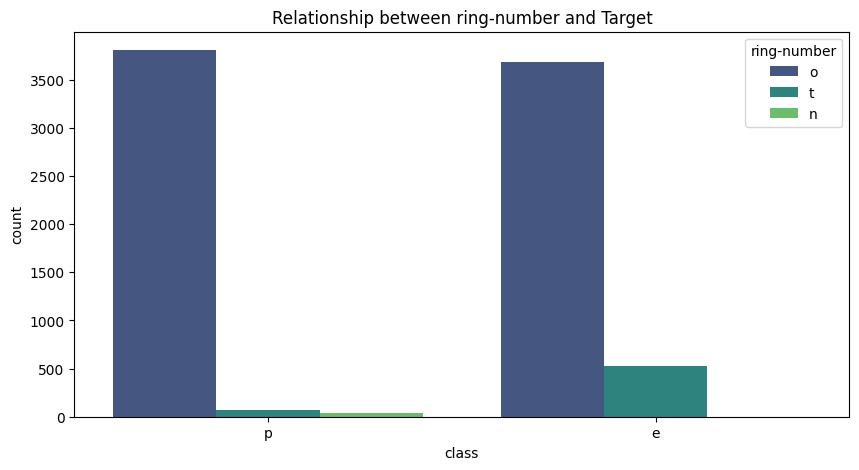

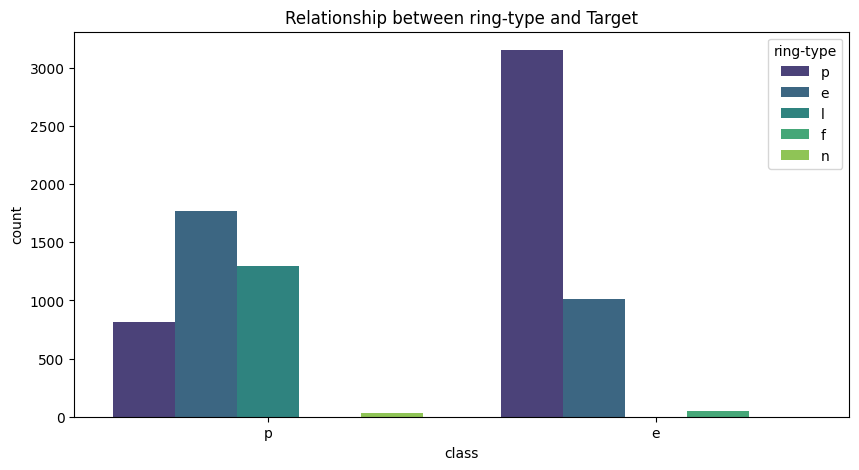

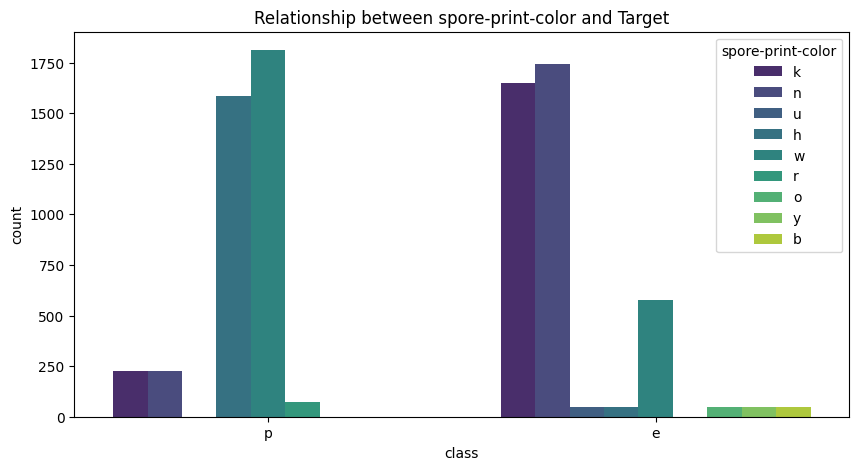

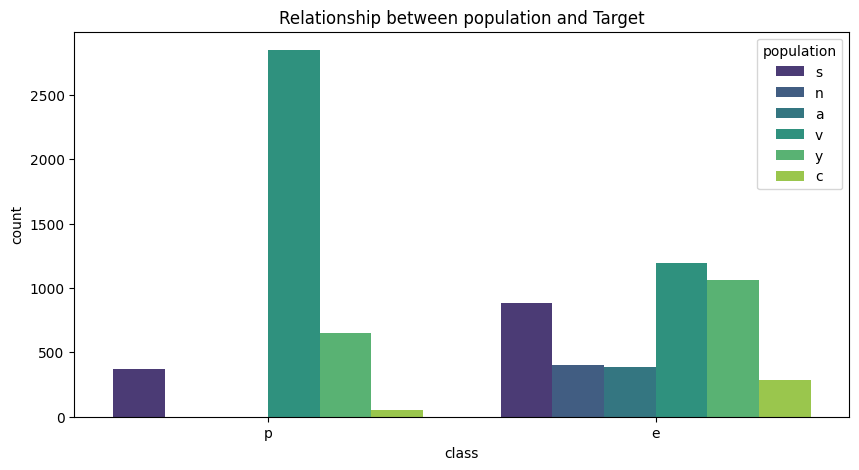

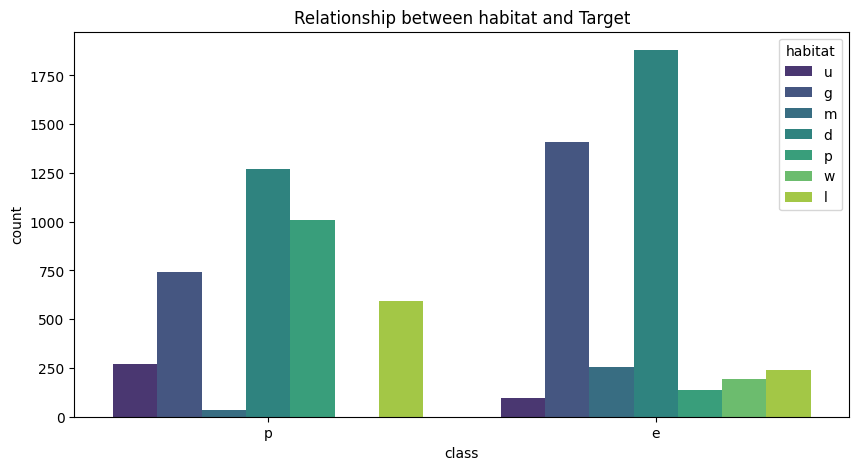

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='class', hue=col, palette='viridis')
    plt.title(f'Relationship between {col} and Target')
    plt.show()

**Applying Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

label_encoders = {}
for column in X.columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

onehotencoder = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), X.columns)],
    remainder='passthrough'
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


h:\python\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
n_estimators_list = [1, 50, 100, 150, 200, 250]

accuracy_results = {}
precision_results = {}
recall_results = {}
f1_results = {}

for n in n_estimators_list:
    rf_pipeline = Pipeline(steps=[
        ('preprocessor', onehotencoder),
        ('classifier', RandomForestClassifier(n_estimators=n, random_state=42))
    ])
    rf_pipeline.fit(X_train, y_train)
    y_pred = rf_pipeline.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred)
    prec_rf = precision_score(y_test, y_pred, average='macro')
    rec_rf = recall_score(y_test, y_pred, average='macro')
    f1_rf = f1_score(y_test, y_pred, average='macro')

# Print the results
    print(f'Number of estimators: {n}')
    print(f"Accuracy: {accuracy_rf:.4f}")
    print(f"Precision: {prec_rf:.4f}")
    print(f"Recall: {rec_rf:.4f}")
    print(f"F1-score: {f1_rf:.4f}")
    print(f"n_estimators: {n}, Accuracy: {accuracy_rf:.4f}")
    accuracy_results[n] = accuracy_rf
    precision_results[n] = prec_rf
    recall_results[n] = rec_rf
    f1_results[n] = f1_rf





Number of estimators: 1
Accuracy: 0.9963
Precision: 0.9963
Recall: 0.9963
F1-score: 0.9963
n_estimators: 1, Accuracy: 0.9963
Number of estimators: 50
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
n_estimators: 50, Accuracy: 1.0000
Number of estimators: 100
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
n_estimators: 100, Accuracy: 1.0000
Number of estimators: 150
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
n_estimators: 150, Accuracy: 1.0000
Number of estimators: 200
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
n_estimators: 200, Accuracy: 1.0000
Number of estimators: 250
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
n_estimators: 250, Accuracy: 1.0000


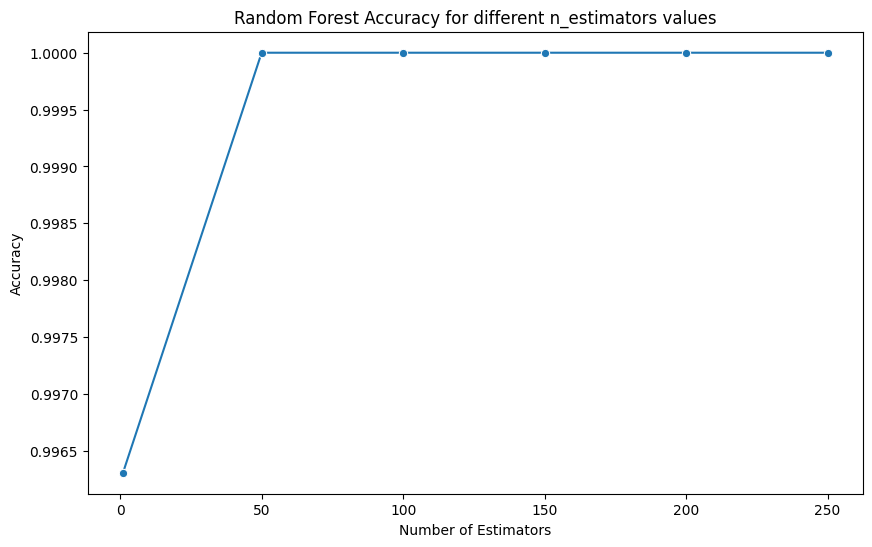

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), marker='o')
plt.title('Random Forest Accuracy for different n_estimators values')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.show()

**Decision Tree**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree


X = mushroom.data.features
y = mushroom.data.targets

X = X.drop(columns=['veil-type'])

#imputing
X['stalk-root'] = X['stalk-root'].fillna(X['stalk-root'].mode()[0])

X_encoded = pd.get_dummies(X)


y = y.squeeze()
if isinstance(y.iloc[0], str):
    y, unique = pd.factorize(y)  # This will convert categories to integers

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


Analyze the dataset

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

Calculate metrics

In [ ]:
# Calculate metrics
acc_dt = accuracy_score(y_test, y_pred)
prec_dt = precision_score(y_test, y_pred, average='macro')
rec_dt = recall_score(y_test, y_pred, average='macro')
f1_dt = f1_score(y_test, y_pred, average='macro')

# Print the results
print(f"Accuracy: {acc_dt:.2f}")
print(f"Precision: {prec_dt:.2f}")
print(f"Recall: {rec_dt:.2f}")
print(f"F1-score: {f1_dt:.2f}")

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-score: 0.99


Confusion matrix

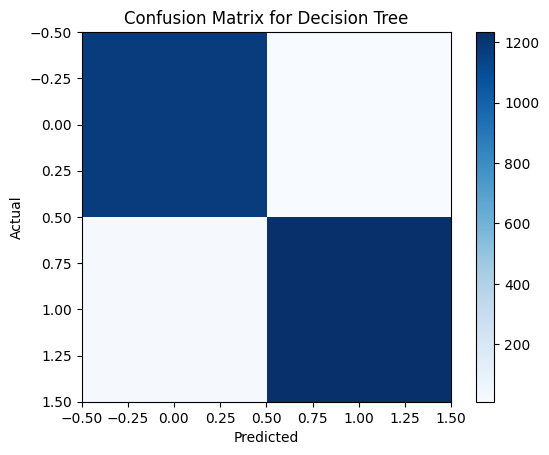

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.colorbar()
plt.show()

Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1181
           1       0.99      0.98      0.99      1257

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



**Decision tree plotting**

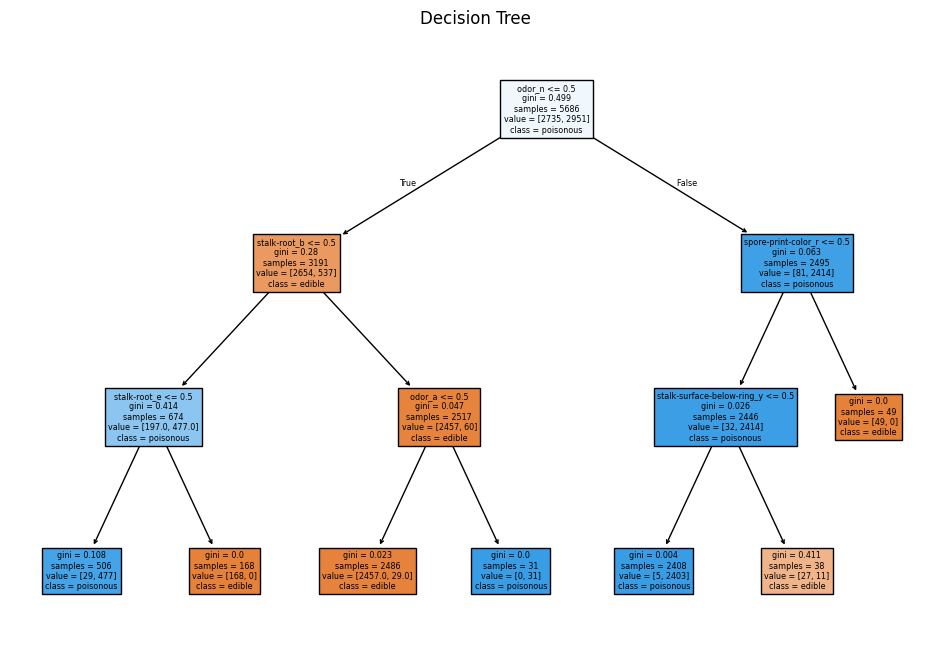

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X_encoded.columns, class_names=['edible', 'poisonous'], filled=True)
plt.title('Decision Tree')
plt.show()

Comparison

In [ ]:
print(f"Decision Tree - Accuracy: {acc_dt:.2f}, Precision: {prec_dt:.2f}, Recall: {rec_dt:.2f}, F1-score: {f1_dt:.2f}")

print("Random forest: ")
for n in n_estimators_list:
    print(f"estimated_n = {n},")
    print(f"Accuracy: {accuracy_results[n]:.4f}, Precision: {precision_results[n]:.2f}, Recall: {recall_results[n]:.2f}, F1-score: {f1_results[n]:.2f}")

Decision Tree - Accuracy: 0.99, Precision: 0.99, Recall: 0.99, F1-score: 0.99
Random forest: 
estimated_n = 1,
Accuracy: 0.9963, Precision: 1.00, Recall: 1.00, F1-score: 1.00
estimated_n = 50,
Accuracy: 1.0000, Precision: 1.00, Recall: 1.00, F1-score: 1.00
estimated_n = 100,
Accuracy: 1.0000, Precision: 1.00, Recall: 1.00, F1-score: 1.00
estimated_n = 150,
Accuracy: 1.0000, Precision: 1.00, Recall: 1.00, F1-score: 1.00
estimated_n = 200,
Accuracy: 1.0000, Precision: 1.00, Recall: 1.00, F1-score: 1.00
estimated_n = 250,
Accuracy: 1.0000, Precision: 1.00, Recall: 1.00, F1-score: 1.00
